<a href="https://colab.research.google.com/github/harshrajput9934/Predicting-Campus-Placement-/blob/main/Predicting_Campus_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the important library**


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the dataset**

In [2]:
df= pd.read_csv("/content/Placement_Data_Full_Class.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**DATA CLEANING AND ANALYSIS**

In [4]:
df.shape


(215, 15)

In [5]:
#checking the missing value
df.isnull().sum()


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#replacing all value with 0
df['salary'].fillna(value=0 , inplace = True )

In [7]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [8]:
#droping the unnecessary columns
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In [9]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability Percentage')

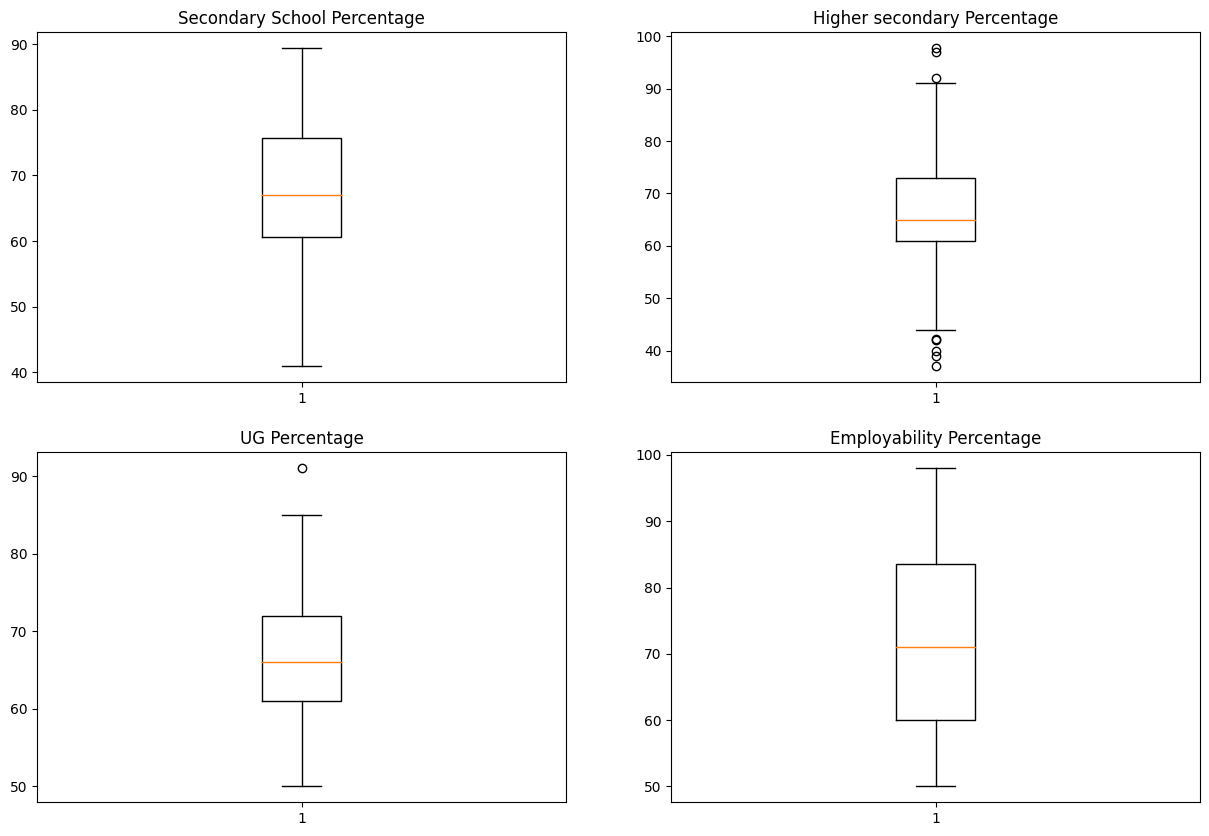

In [10]:
#checking the outliers
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability Percentage')

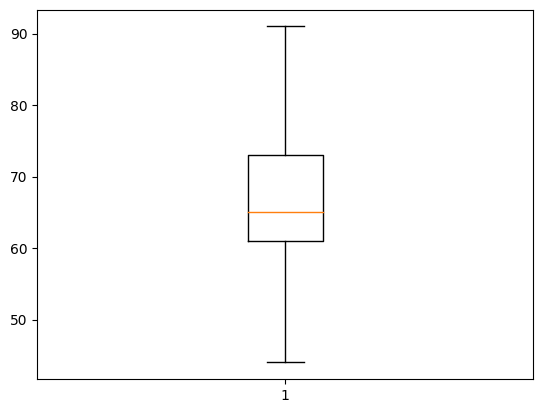

In [11]:
#removing the outliers
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p']<= Q3+ 1.5*IQR)
df_filtered= df.loc[filter]
plt.boxplot(df_filtered['hsc_p'])
plt.show()

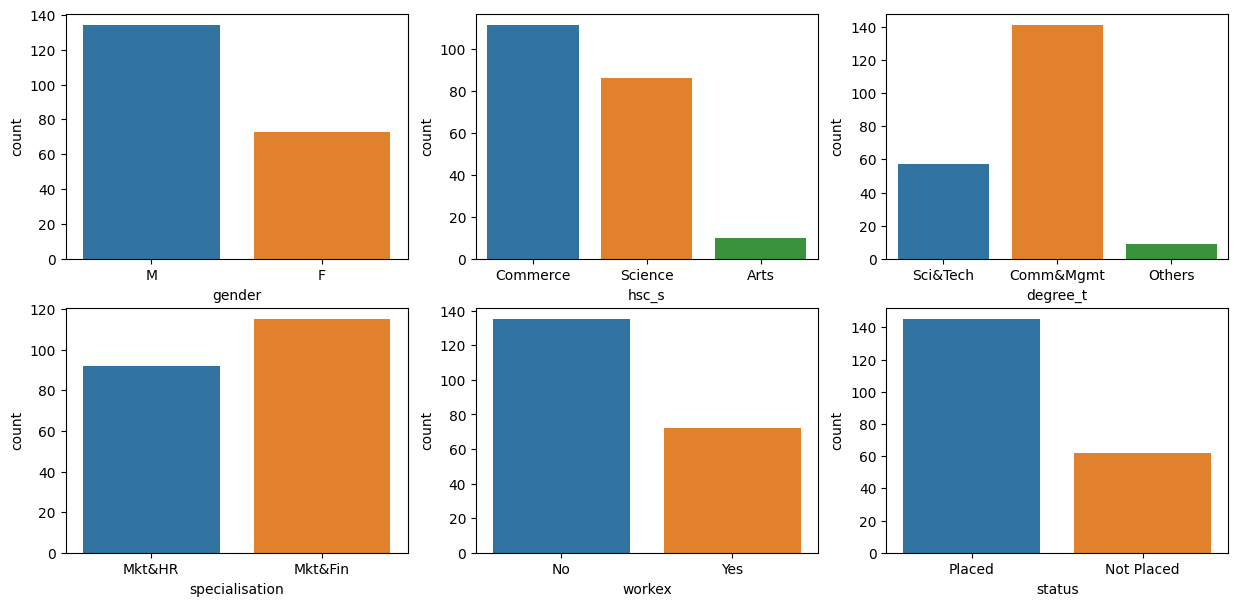

In [12]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = df_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = df_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = df_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = df_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = df_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = df_filtered)

<Axes: xlabel='salary', ylabel='Count'>

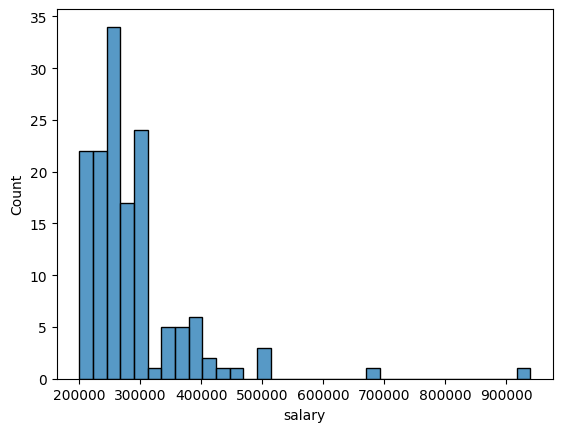

In [13]:
df_placed = df_filtered[df_filtered.salary!= 0]
sns.histplot(df_placed['salary'])

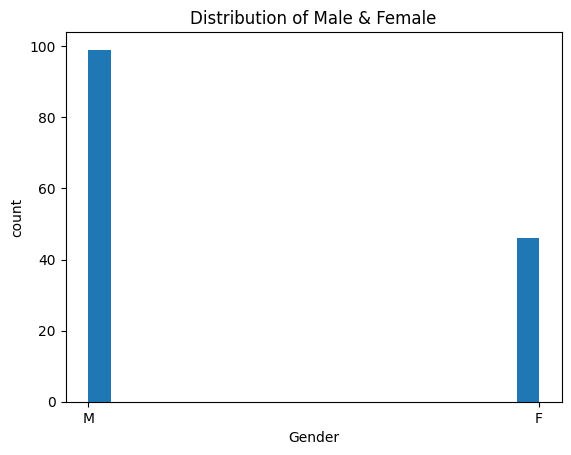

In [14]:
plt.hist(df_placed['gender'],bins=20)
plt.title("Distribution of Male & Female")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()


specialisation in Mkt&Fin 92
specialisation in Mkt&HR 53


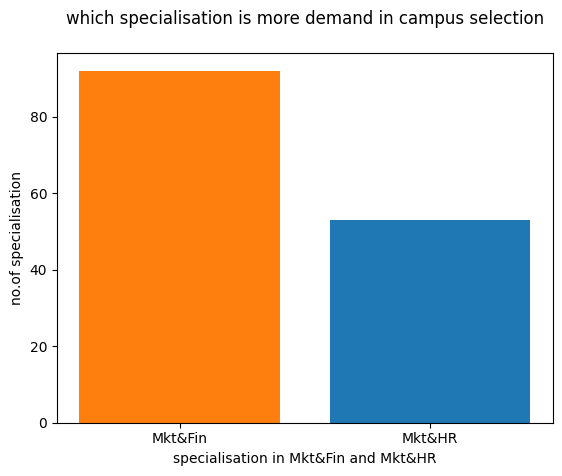

In [15]:
# Specialisation demand in campus selection

plt.bar([1],height=len(df_placed[df_placed["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df_placed[df_placed["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df_placed[df_placed["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df_placed[df_placed["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

In [16]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    df_filtered[col]= label_encoder.fit_transform(df_filtered[col])

df_filtered.head(10)

<ipython-input-16-d10f4cc13399>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col]= label_encoder.fit_transform(df_filtered[col])
<ipython-input-16-d10f4cc13399>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col]= label_encoder.fit_transform(df_filtered[col])
<ipython-input-16-d10f4cc13399>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0,0.0


In [17]:
# One Hot Encoding
dummy_hsc_s = pd.get_dummies(df_filtered['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(df_filtered['degree_t'], prefix = 'dummy')

df_coded = pd.concat([df_filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
df_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
df_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


**MODEL BUILDING**

In [18]:
X = df_coded.drop(['status'],axis=1)
y = df_coded.status
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train , y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# prediction on training data
prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)









Accuracy on training data :  0.9030303030303031


In [25]:
# prediction on test data
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.8333333333333334


In [26]:
df_coded

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


**Predictive system**

In [29]:
new_data = pd.DataFrame({
   'gender':1,
   'ssc_p':67.00,
    'hsc_p':91.00,
    'degree_p':58.00,
    'workex':0,
    'etest_p':55.00,
    'specialisation':1,
    'mba_p':58.80,
    'dummy_Arts':0,
    'dummy_Commerce':	1,
    'dummy_Science':0,
    'dummy_Comm&Mgmt':0,
    'dummy_Others':	0,
    'dummy_Sci&Tech':1,
  },index=[0])
p=model.predict(new_data)

if p==1:
    print('this person is placed for the job')

else:
    print("this person is not placed for the job")

this person is placed for the job


In [41]:
new_data = pd.DataFrame({
   'gender':1,
   'ssc_p':62.00,
    'hsc_p':58.00,
    'degree_p':53.00,
    'workex':0,
    'etest_p':89.00,
    'specialisation':1,
    'mba_p':60.22,
    'dummy_Arts':0,
    'dummy_Commerce':	0,
    'dummy_Science':1,
    'dummy_Comm&Mgmt':1,
    'dummy_Others':	0,
    'dummy_Sci&Tech':0,
  },index=[0])
p=model.predict(new_data)

if p==1:
    print('this person is placed for the job')

else:
    print("this person is not placed for the job")

this person is not placed for the job


In [43]:
new_data = pd.DataFrame({
   'gender':1,
   'ssc_p':65.00,
    'hsc_p':68.00,
    'degree_p':64.00,
    'workex':0,
    'etest_p':75.00,
    'specialisation':0,
    'mba_p':57.80,
    'dummy_Arts':1,
    'dummy_Commerce':	0,
    'dummy_Science':0,
    'dummy_Comm&Mgmt':1,
    'dummy_Others':	0,
    'dummy_Sci&Tech':0,
  },index=[0])
p=model.predict(new_data)

if p==1:
    print('this person is placed for the job')

else:
    print("this person is not placed for the job")

this person is placed for the job
